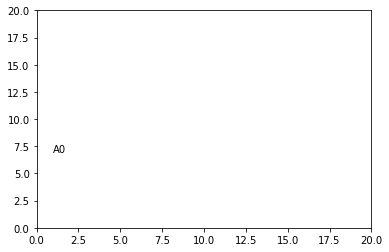

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create initial data
data = np.array([[1,2,3,4,5], [7,4,9,2,3]])

# Create figure and axes
fig = plt.figure()
ax = plt.axes(xlim=(0, 20), ylim=(0, 20))

# Create initial objects
line, = ax.plot([], [], 'r-')
annotation = ax.annotate('A0', xy=(data[0][0], data[1][0]))
annotation.set_animated(True)

# Create the init function that returns the objects
# that will change during the animation process
def init():
    return line, annotation

# Create the update function that returns all the
# objects that have changed
def update(num):
    newData = np.array([[1 + num, 2 + num / 2, 3, 4 - num / 4, 5 + num],
                        [7, 4, 9 + num / 3, 2, 3]])
    line.set_data(newData)
    # This is not working i 1.2.1
    # annotation.set_position((newData[0][0], newData[1][0]))
    annotation.xytext = (newData[0][0], newData[1][0])
    return line, annotation

anim = animation.FuncAnimation(fig, update, frames=25, init_func=init,
                               interval=200, blit=True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

fig, ax = plt.subplots()

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])

L = 50
theta = np.linspace(0,2*np.pi,L)
r = np.ones_like(theta)

x = r*np.cos(theta)
y = r*np.sin(theta)

line, = ax.plot(1,0, 'ro')

annotation = ax.annotate(
    'annotation', xy=(1,0), xytext=(-1,0),
    arrowprops = {'arrowstyle': "->"}
)

def update(i):

    new_x = x[i%L]
    new_y = y[i%L]
    line.set_data(new_x,new_y)

    ##annotation.xytext = (-new_x,-new_y) <-- does not work
    annotation.set_position((-new_x,-new_y))
    annotation.xy = (new_x,new_y)

    return line, annotation

ani = animation.FuncAnimation(
    fig, update, interval = 500, blit = False
)

plt.show()

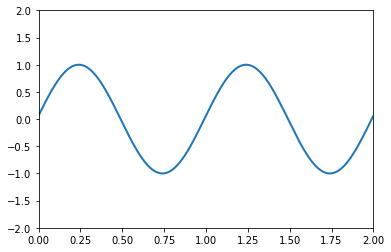

In [3]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()